# Auto Insurance Fraud Detection
## Initial Exploration

In [79]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

### Check the columns and find out the data types

In [67]:
claims = pd.read_csv('insurance_claims.csv')

In [68]:
claims.head()

,months_as_customer,age,gender,education,relationship,occupation,hobbies,deductable,annual_premium,umbrella_limit,...,collision_type,incident_severity,number_of_vehicles,property_damage,bodily_injuries,witnesses,police_report,total_claim,auto_year,fraud_reported
0,328,48,MALE,MD,husband,craft-repair,sleeping,1000,1406.91,0,...,Side Collision,Major Damage,1,YES,1,2,YES,71610,2004,Y
1,228,42,MALE,MD,other-relative,machine-op-inspct,reading,2000,1197.22,5000000,...,?,Minor Damage,1,?,0,0,?,5070,2007,Y
2,134,29,FEMALE,PhD,own-child,sales,board-games,2000,1413.14,5000000,...,Rear Collision,Minor Damage,3,NO,2,3,NO,34650,2007,N
3,256,41,FEMALE,PhD,unmarried,armed-forces,board-games,2000,1415.74,6000000,...,Front Collision,Major Damage,1,?,1,2,NO,63400,2014,Y
4,228,44,MALE,Associate,unmarried,sales,board-games,1000,1583.91,6000000,...,?,Minor Damage,1,NO,0,1,NO,6500,2009,N


In [69]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
months_as_customer    1000 non-null int64
age                   1000 non-null int64
gender                1000 non-null object
education             1000 non-null object
relationship          1000 non-null object
occupation            1000 non-null object
hobbies               1000 non-null object
deductable            1000 non-null int64
annual_premium        1000 non-null float64
umbrella_limit        1000 non-null int64
incident_type         1000 non-null object
collision_type        1000 non-null object
incident_severity     1000 non-null object
number_of_vehicles    1000 non-null int64
property_damage       1000 non-null object
bodily_injuries       1000 non-null int64
witnesses             1000 non-null int64
police_report         1000 non-null object
total_claim           1000 non-null int64
auto_year             1000 non-null int64
fraud_reported        1000 non-null object

### Check mean statistical summaries

In [70]:
claims.describe()

,months_as_customer,age,deductable,annual_premium,umbrella_limit,number_of_vehicles,bodily_injuries,witnesses,total_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,1.83900,0.992000,1.487000,52761.94000,2005.103000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,1.01888,0.820127,1.111335,26401.53319,6.015861
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,1.00000,0.000000,0.000000,100.00000,1995.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,1.00000,0.000000,1.000000,41812.50000,2000.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,1.00000,1.000000,1.000000,58055.00000,2005.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,3.00000,2.000000,2.000000,70592.50000,2010.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,4.00000,2.000000,3.000000,114920.00000,2015.000000


#### Dealing the negative value in 'umbrella_limit' column

In [347]:
claims[claims['umbrella_limit']<0]

,months_as_customer,age,gender,education,relationship,occupation,hobbies,deductable,annual_premium,umbrella_limit,...,number_of_vehicles,property_damage,bodily_injuries,witnesses,police_report,total_claim,auto_year,fraud_reported,education_cat,incident_sev_cat
290,284,42,MALE,Associate,wife,machine-op-inspct,kayaking,500,1338.54,-1000000,...,1,YES,0,1,Unknown,94160,1996,N,1,2


In [348]:
claims['umbrella_limit'] = claims['umbrella_limit'].replace(-1000000, 0)

## Pre_Processing and Feature_Engineering 
### Check and deal with missing values

In [71]:
claims.isnull().sum()

months_as_customer    0
age                   0
gender                0
education             0
relationship          0
occupation            0
hobbies               0
deductable            0
annual_premium        0
umbrella_limit        0
incident_type         0
collision_type        0
incident_severity     0
number_of_vehicles    0
property_damage       0
bodily_injuries       0
witnesses             0
police_report         0
total_claim           0
auto_year             0
fraud_reported        0
dtype: int64

In [58]:
# print out unique values for object columns
for col in claims.select_dtypes(include = 'object'):
    print(claims.select_dtypes(include = 'object')[col].unique())

['MALE' 'FEMALE']
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']
['sleeping' 'reading' 'board-games' 'bungie-jumping' 'base-jumping' 'golf'
 'camping' 'dancing' 'skydiving' 'movies' 'hiking' 'yachting' 'paintball'
 'chess' 'kayaking' 'polo' 'basketball' 'video-games' 'cross-fit'
 'exercise']
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']
['Side Collision' '?' 'Rear Collision' 'Front Collision']
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']
['YES' '?' 'NO']
['YES' '?' 'NO']
['Y' 'N']


In [45]:
len(claims[claims['incident_type'].isin(['Vehicle Theft','Parked Car'])])

178

In [48]:
len(claims[claims['collision_type'].isin(['?'])])

178

In [95]:
claims['collision_type'] = claims['collision_type'].replace('?', 'No Collision')
claims['property_damage'] = claims['property_damage'].replace('?', 'Unknown')
claims['police_report'] = claims['police_report'].replace('?', 'Unknown')

### Recode 'education' into four levels: High School, Associate, College, Graduate 

In [72]:
claims['education'] = claims['education'].replace(['MD','PhD','Masters','JD'], 'Graduate')

In [73]:
claims['education'].unique()

array(['Graduate', 'Associate', 'High School', 'College'], dtype=object)

### Lable encoding for 'education' and 'incident_severity'

In [75]:
# first we change the data type to category 
for col in ['education','incident_severity']:
    claims[col] = claims[col].astype('category')

In [80]:
claims['education_cat'] = claims['education'].cat.codes


In [85]:
claims[['education','education_cat']].head(15)

,education,education_cat
0,Graduate,2
1,Graduate,2
2,Graduate,2
3,Graduate,2
4,Associate,0
5,Graduate,2
6,Graduate,2
7,Associate,0
8,Graduate,2
9,Graduate,2


In [86]:
claims['education_cat'] = claims['education_cat'].replace([0,1,2,3],[1,2,3,0])

In [87]:
claims[['education','education_cat']].head(15)

,education,education_cat
0,Graduate,3
1,Graduate,3
2,Graduate,3
3,Graduate,3
4,Associate,1
5,Graduate,3
6,Graduate,3
7,Associate,1
8,Graduate,3
9,Graduate,3


In [91]:
# now doing the same for incident_severity
claims['incident_sev_cat'] = claims['incident_severity'].cat.codes
claims[['incident_severity','incident_sev_cat']].head(10)

,incident_severity,incident_sev_cat
0,Major Damage,0
1,Minor Damage,1
2,Minor Damage,1
3,Major Damage,0
4,Minor Damage,1
5,Major Damage,0
6,Minor Damage,1
7,Total Loss,2
8,Total Loss,2
9,Total Loss,2


In [92]:
claims['incident_sev_cat'] = claims['incident_sev_cat'].replace([0,1,2,3],[2,1,3,0])
claims[['incident_severity','incident_sev_cat']].head(10)

,incident_severity,incident_sev_cat
0,Major Damage,2
1,Minor Damage,1
2,Minor Damage,1
3,Major Damage,2
4,Minor Damage,1
5,Major Damage,2
6,Minor Damage,1
7,Total Loss,3
8,Total Loss,3
9,Total Loss,3


### One hot encoding on other categorical columns

In [98]:
dummyVar = pd.get_dummies(claims[['gender','relationship','occupation','hobbies','incident_type','collision_type','property_damage','police_report']])

In [99]:

dummyVar.head()

,gender_FEMALE,gender_MALE,relationship_husband,relationship_not-in-family,relationship_other-relative,relationship_own-child,relationship_unmarried,relationship_wife,occupation_adm-clerical,occupation_armed-forces,...,collision_type_Front Collision,collision_type_No Collision,collision_type_Rear Collision,collision_type_Side Collision,property_damage_NO,property_damage_Unknown,property_damage_YES,police_report_NO,police_report_Unknown,police_report_YES
0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,1,0,1,0,0
4,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [350]:
claims_new = pd.concat([dummyVar, claims], axis=1)
claims_new = claims_new.drop(['gender','relationship','occupation','hobbies','incident_type','collision_type','property_damage','police_report','education','incident_severity'], axis=1)
claims_new.columns


Index(['gender_FEMALE', 'gender_MALE', 'relationship_husband',
       'relationship_not-in-family', 'relationship_other-relative',
       'relationship_own-child', 'relationship_unmarried', 'relationship_wife',
       'occupation_adm-clerical', 'occupation_armed-forces',
       'occupation_craft-repair', 'occupation_exec-managerial',
       'occupation_farming-fishing', 'occupation_handlers-cleaners',
       'occupation_machine-op-inspct', 'occupation_other-service',
       'occupation_priv-house-serv', 'occupation_prof-specialty',
       'occupation_protective-serv', 'occupation_sales',
       'occupation_tech-support', 'occupation_transport-moving',
       'hobbies_base-jumping', 'hobbies_basketball', 'hobbies_board-games',
       'hobbies_bungie-jumping', 'hobbies_camping', 'hobbies_chess',
       'hobbies_cross-fit', 'hobbies_dancing', 'hobbies_exercise',
       'hobbies_golf', 'hobbies_hiking', 'hobbies_kayaking', 'hobbies_movies',
       'hobbies_paintball', 'hobbies_polo', 'hobb

### Check correlation among numeric features

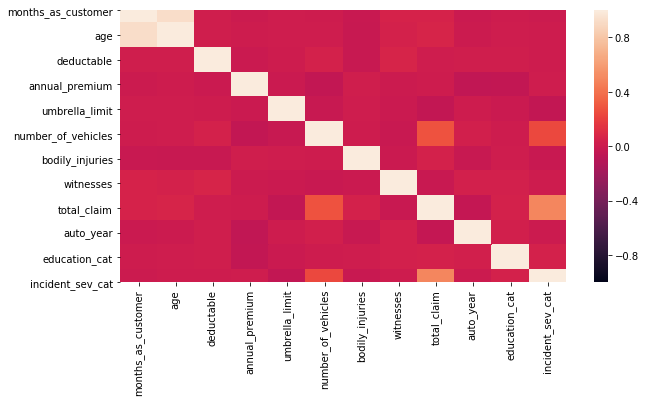

In [351]:
corr = claims.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, vmin=-1, vmax=1)

#### Drop highly correlated feature

In [352]:
claims_new = claims_new.drop('age',1)

#### Move the dependent variable to the end of the dataset

In [353]:
claims_new['fraud'] = claims_new['fraud_reported']
claims_new = claims_new.drop('fraud_reported', axis=1)
claims_new.head()

,gender_FEMALE,gender_MALE,relationship_husband,relationship_not-in-family,relationship_other-relative,relationship_own-child,relationship_unmarried,relationship_wife,occupation_adm-clerical,occupation_armed-forces,...,annual_premium,umbrella_limit,number_of_vehicles,bodily_injuries,witnesses,total_claim,auto_year,education_cat,incident_sev_cat,fraud
0,0,1,1,0,0,0,0,0,0,0,...,1406.91,0,1,1,2,71610,2004,3,2,Y
1,0,1,0,0,1,0,0,0,0,0,...,1197.22,5000000,1,0,0,5070,2007,3,1,Y
2,1,0,0,0,0,1,0,0,0,0,...,1413.14,5000000,3,2,3,34650,2007,3,1,N
3,1,0,0,0,0,0,1,0,0,1,...,1415.74,6000000,1,1,2,63400,2014,3,2,Y
4,0,1,0,0,0,0,1,0,0,0,...,1583.91,6000000,1,0,1,6500,2009,1,1,N


### Binning 'months_as_customer'

In [354]:
claims_new['months_as_customer'] = pd.cut(x=claims_new['months_as_customer'], bins=[-np.inf,120,240,360,480], labels=[1,2,3,4])
#labels=['10y','20y','30y','40y']
claims_new['months_as_customer'].value_counts()

2    359
3    269
1    263
4    109
Name: months_as_customer, dtype: int64

In [355]:
claims_new['months_as_customer'] = pd.to_numeric(claims_new['months_as_customer'])

## Exploratory Analysis 

In [356]:
# check the percentage of fraud
print(round(sum(claims_new['fraud'] == 'Y') / len(claims_new['fraud']) * 100, 2),'%')


24.7 %


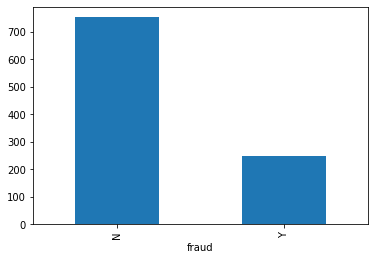

In [357]:
claims_new.groupby('fraud')['fraud'].count().plot.bar()

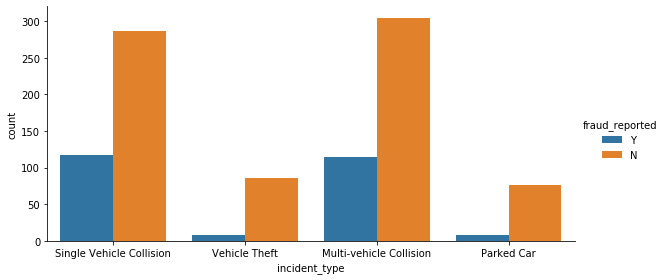

In [210]:
sns.catplot(x='incident_type', data=claims, hue='fraud_reported', kind='count',  height = 4,aspect=2)

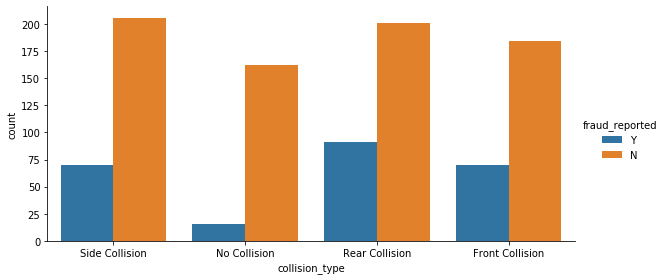

In [211]:
sns.catplot(x='collision_type', data=claims, hue='fraud_reported', kind='count', height = 4,aspect=2)

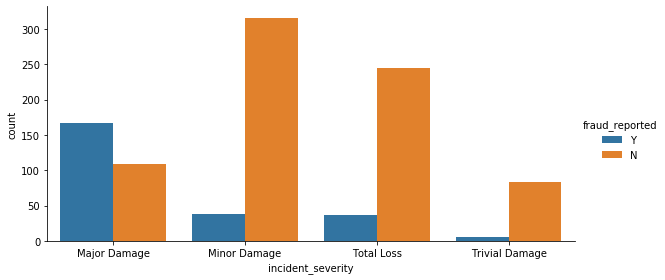

In [431]:
sns.catplot(x='incident_severity', data=claims, hue='fraud_reported', kind='count', height = 4,aspect=2)

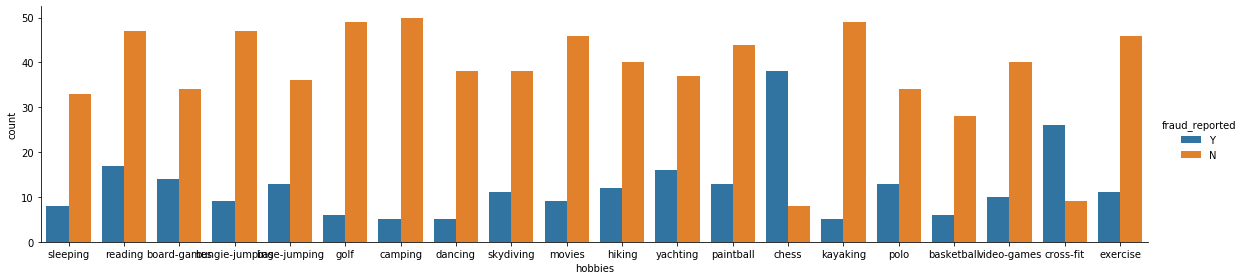

In [228]:
sns.catplot(x='hobbies', data=claims, hue='fraud_reported', kind='count', height = 4,aspect=4)

In [419]:
claims.groupby('hobbies')['hobbies'].count().sort_values(ascending=False)

hobbies
reading           64
exercise          57
paintball         57
bungie-jumping    56
golf              55
camping           55
movies            55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: hobbies, dtype: int64

## Machine Learning 

In [239]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2

In [243]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [358]:
claimsML = claims_new

### Use all variables to create baseline models

In [359]:
claimsML_all = claimsML

In [360]:
X_all = claimsML_all.iloc[:,:-1]
y_all = claimsML_all.iloc[:,-1]
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all, y_all, test_size = 0.3, random_state=0)

In [361]:
print('Train', X_all_train.shape, y_all_train.shape)
print('Test', X_all_test.shape, y_all_test.shape)

Train (700, 67) (700,)
Test (300, 67) (300,)


#### Random Forest

In [362]:
rfClassifer = RandomForestClassifier(n_estimators=20)
rf = rfClassifer.fit(X_all_train, y_all_train)
rfTrainPred = rf.predict(X_all_train)
rfPred = rf.predict(X_all_test)

In [262]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score

In [420]:
print("Accuracy on train is:",accuracy_score(y_all_train,rfTrainPred))
print("Accuracy on test is:",accuracy_score(y_all_test, rfPred))

from sklearn.metrics import classification_report 
rfreport = classification_report(y_all_test, rfPred)
print(rfreport)

Accuracy on train is: 0.9957142857142857
Accuracy on test is: 0.7566666666666667
              precision    recall  f1-score   support

           N       0.77      0.96      0.85       223
           Y       0.59      0.17      0.26        77

    accuracy                           0.76       300
   macro avg       0.68      0.56      0.56       300
weighted avg       0.72      0.76      0.70       300



#### Gradient Boosting

In [364]:
gbClassifer = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
gb = gbClassifer.fit(X_all_train, y_all_train)
gbTrainPred = gb.predict(X_all_train)
gbPred = gb.predict(X_all_test)
print("Accuracy on train is:",accuracy_score(y_all_train,gbTrainPred))
print("Accuracy on test is:",accuracy_score(y_all_test, gbPred))

Accuracy on train is: 0.9528571428571428
Accuracy on test is: 0.8166666666666667


In [365]:
gbreport = classification_report(y_all_test, gbPred)
print(gbreport)

              precision    recall  f1-score   support

           N       0.86      0.90      0.88       223
           Y       0.66      0.58      0.62        77

    accuracy                           0.82       300
   macro avg       0.76      0.74      0.75       300
weighted avg       0.81      0.82      0.81       300



#### Check feature importance

In [366]:
featureImp = pd.Series(gbClassifer.feature_importances_, list(X_all_train)).sort_values(ascending=False)[:10]

Text(0, 0.5, 'Feature Importance Score')

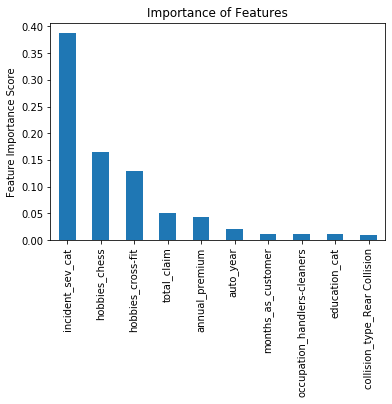

In [367]:
featureImp.plot(kind='bar', title='Importance of Features' )
plt.ylabel('Feature Importance Score')

## Feature selection, chi-squared
### Use selected features to run Gradient Boosting

In [342]:
from sklearn.feature_selection import SelectKBest

In [410]:
fs = SelectKBest(score_func=chi2, k=60)
fs.fit(X_all_train, y_all_train)
X_fs_train = fs.transform(X_all_train)
X_fs_test = fs.transform(X_all_test)

gbClassifer = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
gb_fs = gbClassifer.fit(X_fs_train, y_all_train)
gbTrainPred_fs = gb_fs.predict(X_fs_train)
gbPred_fs = gb_fs.predict(X_fs_test)
print("Accuracy on train is:",accuracy_score(y_all_train,gbTrainPred))
print("Accuracy on test is:",accuracy_score(y_all_test, gbPred))
gbreport_fs = classification_report(y_all_test, gbPred_fs)
print(gbreport_fs)

Accuracy on train is: 0.9528571428571428
Accuracy on test is: 0.8166666666666667
              precision    recall  f1-score   support

           N       0.89      0.92      0.91       223
           Y       0.75      0.66      0.70        77

    accuracy                           0.86       300
   macro avg       0.82      0.79      0.80       300
weighted avg       0.85      0.86      0.85       300



In [414]:
features = fs.get_support(indices=True)
features_fs = X_all_train.iloc[:,features]

Text(0, 0.5, 'Feature Importance Score')

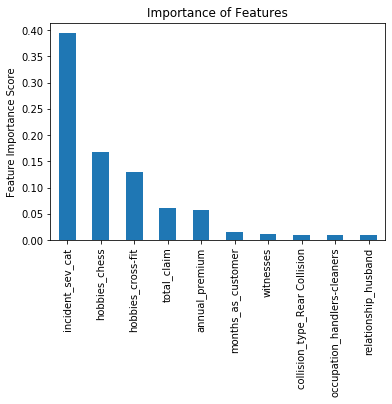

In [415]:
featureImp_fs = pd.Series(gbClassifer.feature_importances_, list(features_fs)).sort_values(ascending=False)[:10]
featureImp_fs.plot(kind='bar', title='Importance of Features' )
plt.ylabel('Feature Importance Score')

## Grid search for finding optimal hyperparameters

In [423]:
from sklearn.model_selection import GridSearchCV

param_grid={'n_estimators':[30,50,70,100,120,150,170,200], 
            'learning_rate': [0.05, 0.07,0.1, 0.12,0.15]}
gridSearch= GridSearchCV(GradientBoostingClassifier(), param_grid, cv=3, scoring='f1_weighted')
gridSearch.fit(X_fs_train, y_all_train)
print(gridSearch.score(X_fs_train, y_all_train))
print(gridSearch.best_params_)

0.9112499263737855
{'learning_rate': 0.07, 'n_estimators': 50}


In [430]:
gbClassiferGS = GradientBoostingClassifier(n_estimators=60, learning_rate=0.07)
gbGS = gbClassiferGS.fit(X_fs_train, y_all_train)
gbTrainPred_GS = gbGS.predict(X_fs_train)
gbPred_GS = gbGS.predict(X_fs_test)
print("Accuracy on train is:",accuracy_score(y_all_train,gbTrainPred_GS))
print("Accuracy on test is:",accuracy_score(y_all_test, gbPred_GS))
gbreport_GS = classification_report(y_all_test, gbPred_GS)
print(gbreport_GS)

Accuracy on train is: 0.9185714285714286
Accuracy on test is: 0.8333333333333334
              precision    recall  f1-score   support

           N       0.87      0.91      0.89       223
           Y       0.70      0.61      0.65        77

    accuracy                           0.83       300
   macro avg       0.79      0.76      0.77       300
weighted avg       0.83      0.83      0.83       300



## The final model we pick is 'gb_fs', using chi-squared feature selection